# Predicción dos pasos adelante utilizando árboles de decisión

## Integrantes
* Jhon Anderson Guarín
* Juan David Duitama
* Ander Steven Cristancho

## Librerías utilizadas

In [3]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn

## Importación de datos

In [3]:
Pm25_DF = pd.read_csv("d-Shanghai-1317.txt",index_col=False,names=['PM25'])
Pm25_DF
Pm25_DF.size

1611

In [4]:
indice = pd.date_range(start='1/1/2013', periods=1611, freq='D')#creando un objeto que tenga las fechas desde el 1/1/2013 hasta 1611 días después
indice
PM25ts =pd.Series(Pm25_DF['PM25'].values,index=indice)#Ahora sí creo el objeto tipo serie de tiempo
PM25df =pd.DataFrame(Pm25_DF['PM25'].values,index=indice)#Y también un dataframe
type(PM25ts)
PM25df

,0
2013-01-01,78.08333
2013-01-02,58.54167
2013-01-03,45.87500
2013-01-04,49.25000
2013-01-05,52.87500
...,...
2017-05-26,25.83333
2017-05-27,29.12500
2017-05-28,18.75000
2017-05-29,22.87500


2013-01-01    78.08333
2013-01-02    58.54167
2013-01-03    45.87500
2013-01-04    49.25000
2013-01-05    52.87500
Freq: D, dtype: float64


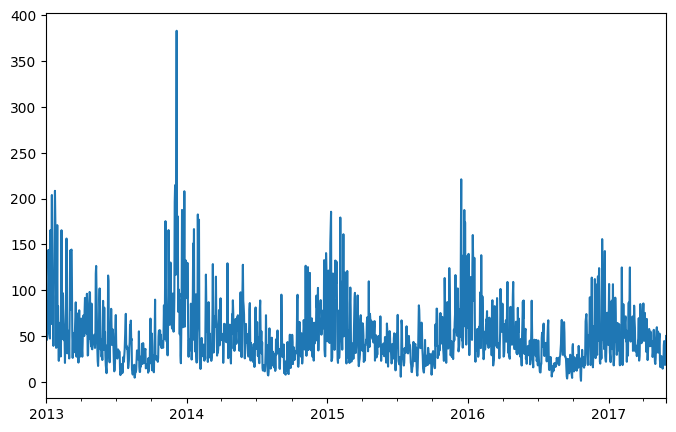

In [4]:
print(PM25ts.head(5))

PM25ts.plot(figsize=(8,5))#Un gráfico simple de la serie de tiempo
pyplot.show()

## Creación de variables rezagadas
Del anterior Notebook, los retardos seleccionados para realizar el análisis fueron los retardos
* t-1
* t-2
* t-3
* t-4
* t-5
* t-6
* t-7
* t-8
* t-9
* t-10
* t-365
* t-366
* t-367
* t-368
* t-369
* t-370

In [5]:
from pandas import DataFrame
df1 = DataFrame()#Creando un DataFrame vacío para luego llenar
print(df1)

Empty DataFrame
Columns: []
Index: []


Creando los inputs

In [6]:
for i in range(10,0,-1):
    df1[['t-'+str(i)]] = PM25df.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo, y al hacer
    
for i in range(370,364,-1):   
    df1[['t-'+str(i)]] = PM25df.shift(i)
df1=df1.iloc[:-1]

Creando los outputs, ya que voy a hacer la predicción dos pasos adelante, esta columna será diferente

In [7]:
# Create column t
df1['t+1'] = PM25df.values[1:]
print(df1.head(13))

                t-10       t-9       t-8       t-7        t-6        t-5  \
2013-01-01       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-02       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-03       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-04       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-05       NaN       NaN       NaN       NaN        NaN        NaN   
2013-01-06       NaN       NaN       NaN       NaN        NaN   78.08333   
2013-01-07       NaN       NaN       NaN       NaN   78.08333   58.54167   
2013-01-08       NaN       NaN       NaN  78.08333   58.54167   45.87500   
2013-01-09       NaN       NaN  78.08333  58.54167   45.87500   49.25000   
2013-01-10       NaN  78.08333  58.54167  45.87500   49.25000   52.87500   
2013-01-11  78.08333  58.54167  45.87500  49.25000   52.87500   85.12500   
2013-01-12  58.54167  45.87500  49.25000  52.87500   85.12500  144.00000   
2013-01-13  

Removiendo los NAs

In [8]:
df1_PM25 = df1[370:]
print(df1_PM25)
df1_PM25.size

                 t-10        t-9        t-8        t-7        t-6        t-5  \
2014-01-06   60.29167   98.87500  132.87500  114.79170   96.45833  126.70830   
2014-01-07   98.87500  132.87500  114.79170   96.45833  126.70830   91.45833   
2014-01-08  132.87500  114.79170   96.45833  126.70830   91.45833  129.91670   
2014-01-09  114.79170   96.45833  126.70830   91.45833  129.91670   99.75000   
2014-01-10   96.45833  126.70830   91.45833  129.91670   99.75000   50.33333   
...               ...        ...        ...        ...        ...        ...   
2017-05-25   16.29167   22.75000   23.45833   28.29167   22.33333   18.20833   
2017-05-26   22.75000   23.45833   28.29167   22.33333   18.20833   14.62500   
2017-05-27   23.45833   28.29167   22.33333   18.20833   14.62500   23.29167   
2017-05-28   28.29167   22.33333   18.20833   14.62500   23.29167   18.33333   
2017-05-29   22.33333   18.20833   14.62500   23.29167   18.33333   39.87500   

                  t-4        t-3       

21080

Tengo 1240 datos

## División de los datos

In [9]:
PM25split = df1_PM25.values #Convirtiendo en NumpyArray
X1= PM25split[:, 0:-1]#Selecciono todas las filas, y todas las columnas excepto la última que es la variable respuesta
y1 =PM25split[:,-1] #Selecciono todas las filas y solo la última columna

Tamaños de los conjuntos de entrenamiento, validación y prueba

In [10]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

# Se debe adicionar en este caso una observación a algún conjunto de datos, en este caso es para el conjunto de validación

Complete Observations for Target after Supervised configuration: 1240
868 124 248
Train + Validation + Test: 1240


Creando los conjuntos de datos

In [11]:
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

In [12]:
trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))


Observations for Feature: 1240
Training Observations for Feature: 868
Validation Observations for Feature: 124
Test Observations for Feature: 248


## Creando el árbol

Recordemos que en este caso no se está especificando la profundidad del árbol, por lo que adoptará la profundidad máxima, es decir, sobreajuste

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_PM25 = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_PM25.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PM25.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_PM25.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM sobre validación es:",(((decision_tree_PM25.predict(val_feature)-val_target)**2).mean()) )


Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -1.3501243083704053
el RECM sobre validación es: 661.7564318438774


Explorando diferentes profundidades

In [14]:
for d in [2, 3, 4, 5,6,7,8,9,10,11,12]:
    # Create the tree and fit it
    decision_tree_PM25 = DecisionTreeRegressor(max_depth=d)
    decision_tree_PM25.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_PM25.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_PM25.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_PM25.predict(val_feature),val_target, squared=False))



max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.14688855643359477
Coeficiente R2 sobre el conjunto de validación: -0.534013621959265 

el RECM sobre el conjunto de validación es: 20.783480402811097
max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.22784758284199302
Coeficiente R2 sobre el conjunto de validación: -0.3257937377051261 

el RECM sobre el conjunto de validación es: 19.32153606295755
max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.2952117905377202
Coeficiente R2 sobre el conjunto de validación: -0.24010995152062042 

el RECM sobre el conjunto de validación es: 18.686749530077993
max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.3576343184653835
Coeficiente R2 sobre el conjunto de validación: -0.1066154214129964 

el RECM sobre el conjunto de validación es: 17.6523295746736
max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.4215306931009343
Coeficiente R2 sobre el conjunto de validación: -0.084

C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is depr

Coeficiente R2 sobre el conjunto de entrenamiento: 0.5976520495244441
Coeficiente R2 sobre el conjunto de validación: -0.48447317044964255 

el RECM sobre el conjunto de validación es: 20.445128506157157
max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6656919691384786
Coeficiente R2 sobre el conjunto de validación: -0.4027061867688031 

el RECM sobre el conjunto de validación es: 19.874079578642018
max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7243261158761636
Coeficiente R2 sobre el conjunto de validación: -0.6301788173644287 

el RECM sobre el conjunto de validación es: 21.42502271382503
max_depth= 12
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7734815804947248
Coeficiente R2 sobre el conjunto de validación: -0.7428656180732363 

el RECM sobre el conjunto de validación es: 22.153156700582368


C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


La profundidad que mejor(menor) RECM obtuvo fue 6

## Usando Penalización

In [15]:
path=decision_tree_PM25.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 9.00057604e-06 1.59997440e-05 1.60016641e-05
 1.60016641e-05 4.90143376e-05 2.89015777e-04 3.61017025e-04
 4.84034498e-04 6.25080006e-04 7.29042771e-04 7.29046659e-04
 9.00057604e-04 9.00057604e-04 1.14824458e-03 1.84898074e-03
 1.93611687e-03 2.20913386e-03 2.40113799e-03 2.60116647e-03
 2.70418139e-03 2.91618664e-03 3.24920795e-03 3.33356802e-03
 3.96925403e-03 3.96925403e-03 4.76130472e-03 5.32935276e-03
 5.47633865e-03 5.77638185e-03 5.92936716e-03 6.40066565e-03
 6.49840495e-03 6.53440236e-03 6.62742416e-03 7.30178486e-03
 7.60090032e-03 8.00881283e-03 8.28154458e-03 8.64090352e-03
 9.30310516e-03 9.60492832e-03 1.14497670e-02 1.16167646e-02
 1.17820774e-02 1.32254784e-02 1.39248534e-02 1.63850282e-02
 1.74251152e-02 1.84972056e-02 2.04502859e-02 2.34104983e-02
 2.39820716e-02 2.46506028e-02 2.50269497e-02 2.52826181e-02
 2.56015873e-02 2.62939562e-02 2.76142297e-02 2.82258065e-02
 2.95859210e-02 2.96031962e-02 3.06049587e-02 3.38581964e-02
 3.58849881e-02 3.785877

In [16]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(train_feature, train_target)
    y_train_pred=tree.predict(train_feature)
    y_val_pred=tree.predict(val_feature)


    accuracy_train.append(sklearn.metrics.mean_squared_error(y_train_pred, train_target, squared=False))
    accuracy_test.append(sklearn.metrics.mean_squared_error(y_val_pred, val_target,squared=False))



C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is depr

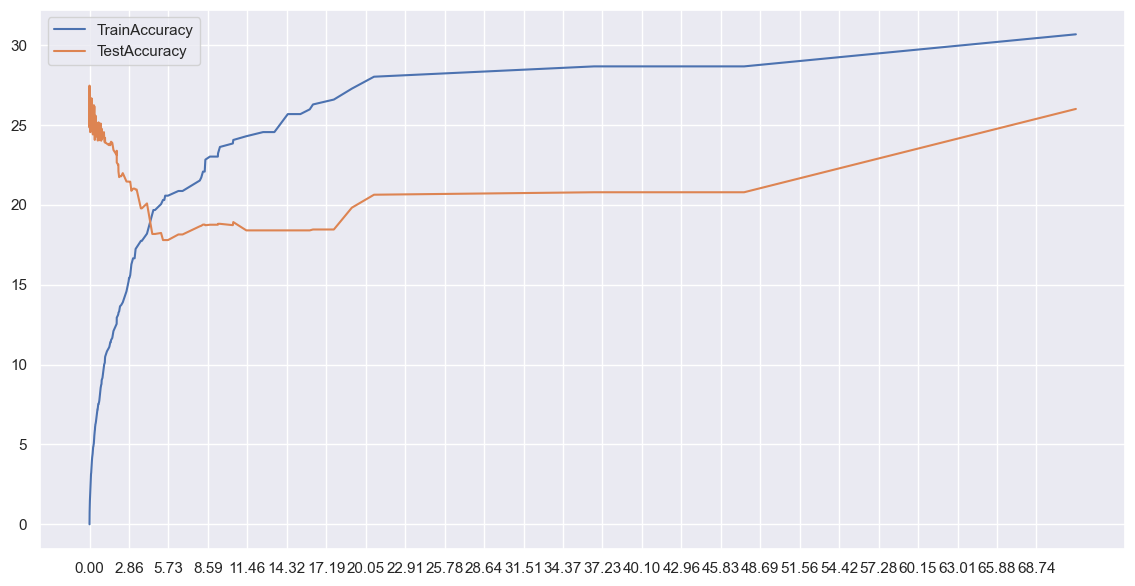

In [19]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="TestAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

# Modelo completo(juntar entrenamiento y validación)

In [21]:
#### Tamaño entrenamiento y validación de las entradas
print(train_feature.shape)
print(val_feature.shape)
#### Tamaño entrenamiento y validación de las salidas
print(train_target.shape)
print(val_target.shape)

###Unión de ambos conjuntos
train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)


(868, 16)
(124, 16)
(868,)
(124,)
(992, 16)
(992,)


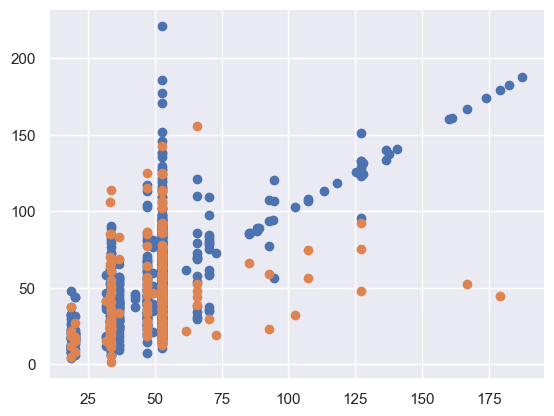

Raíz de la Pérdida cuadrática Entrenamiento: 22.902743866745613
Raíz de la Pérdida cuadrática Prueba: 29.61191004625719


C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\JUAN DAVID\anaconda3\envs\SeriesDeTiempo\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
# Gráfico de los valores predichos vs los verdaderos(entrenamiento y validación)

from matplotlib import pyplot as plt

# Usando la profundidad 6

decision_tree_PM25 = DecisionTreeRegressor(max_depth=6)  #Creando el árbol con la profundidad anteriormente seleccionada - 6
decision_tree_PM25.fit(train_val_feature, train_val_target) #Entrenando el árbol

# Predicción de entrenamiento y test
train_val_prediction = decision_tree_PM25.predict(train_val_feature)
test_prediction = decision_tree_PM25.predict(test_feature)

# Gráfico de las predicciones vs los verdaderos(lo ideal sería una recta y=x)
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))


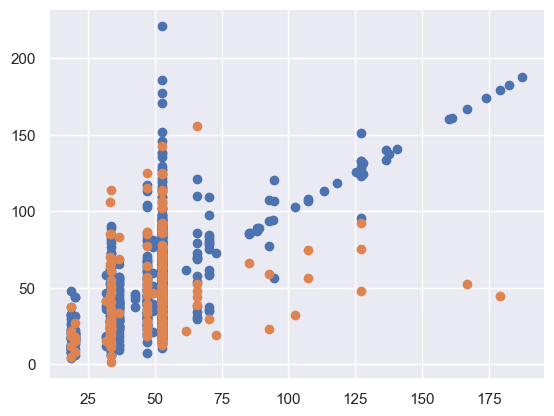

In [25]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_PM25_prun_mincost = DecisionTreeRegressor(ccp_alpha=5.5)  # fill in best max depth here
decision_tree_PM25_prun_mincost.fit(train_val_feature, train_val_target)

# Predict values for train and test
train_val_prediction_prun_mincost = decision_tree_PM25.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_PM25.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # orange
plt.show()

In [26]:
from sklearn import tree

listacaract=list(df1_PM25.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_PM25)
print(text_representation)

|--- feature_9 <= 34.40
|   |--- feature_14 <= 43.77
|   |   |--- feature_5 <= 138.00
|   |   |   |--- feature_13 <= 75.62
|   |   |   |   |--- feature_9 <= 15.02
|   |   |   |   |   |--- feature_14 <= 16.77
|   |   |   |   |   |   |--- value: [31.62]
|   |   |   |   |   |--- feature_14 >  16.77
|   |   |   |   |   |   |--- value: [18.71]
|   |   |   |   |--- feature_9 >  15.02
|   |   |   |   |   |--- feature_4 <= 15.08
|   |   |   |   |   |   |--- value: [20.27]
|   |   |   |   |   |--- feature_4 >  15.08
|   |   |   |   |   |   |--- value: [33.49]
|   |   |   |--- feature_13 >  75.62
|   |   |   |   |--- feature_12 <= 99.60
|   |   |   |   |   |--- feature_6 <= 21.02
|   |   |   |   |   |   |--- value: [72.88]
|   |   |   |   |   |--- feature_6 >  21.02
|   |   |   |   |   |   |--- value: [42.61]
|   |   |   |   |--- feature_12 >  99.60
|   |   |   |   |   |--- feature_4 <= 53.42
|   |   |   |   |   |   |--- value: [61.54]
|   |   |   |   |   |--- feature_4 >  53.42
|   |   |   |   

In [2]:
fig = plt.figure(figsize=(25,20))
hola = tree.plot_tree(decision_tree_PM25, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

NameError: name 'plt' is not defined

In [31]:
#Tamaños de entrenamientos y test
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

992
992
248
248


In [32]:
indicetrian_val_test=df1_PM25.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:992]
indicetest=indicetrian_val_test[992:1240]

1240


In [33]:
print(indicetrain_val.size)
print(indicetest.size)

992
248


In [34]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

1240
1240


In [35]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)

,observado,Predicción
2014-01-06,46.20833,52.743701
2014-01-07,38.91667,47.218483
2014-01-08,34.29167,52.743701
2014-01-09,45.58333,52.743701
2014-01-10,45.45833,47.218483
2014-01-11,85.41667,85.416670
2014-01-12,39.41667,52.743701
2014-01-13,24.50000,52.743701
2014-01-14,34.41667,52.743701
2014-01-15,69.58333,65.708334


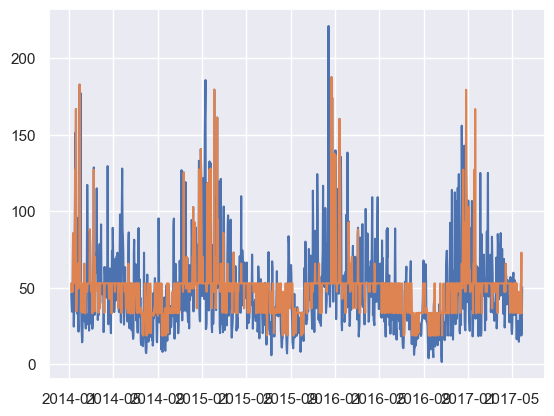

In [36]:
plt.plot(ObsvsPred)

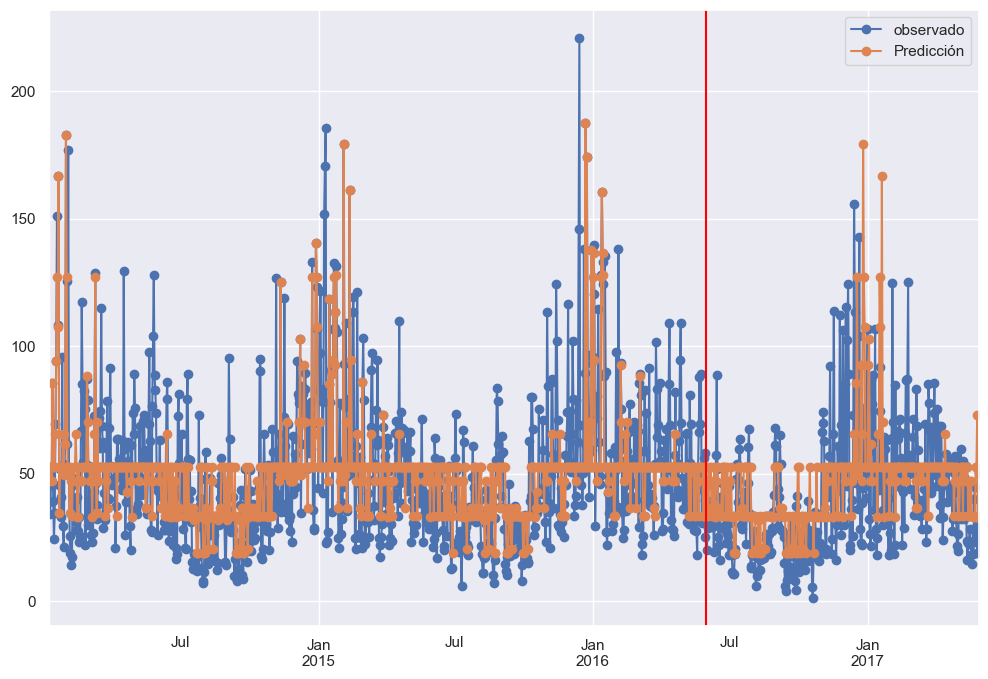

In [37]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_val_test[876].date(),color='red')